In [1]:
import pandas as pd
import random
from faker import Faker

fake = Faker()
Faker.seed(42)
random.seed(42)

cities = ['Philadelphia', 'Pittsburgh', 'Allentown', 'Reading', 'Erie', 'Bethlehem', 'Scranton',
          'Lancaster', 'Harrisburg', 'York']
city_weights = [0.20, 0.15, 0.10, 0.10, 0.10, 0.08, 0.07, 0.07, 0.07, 0.06]
room_types = ['Entire home/apt', 'Private room', 'Shared room']

city_price_adjustments = {
    'Philadelphia': 1.2,
    'Pittsburgh': 1.15,
    'Allentown': 1.05,
    'Erie': 0.9,
    'York': 0.95,
    'Reading': 1.0,
    'Scranton': 0.95,
    'Harrisburg': 1.0,
    'Bethlehem': 1.0,
    'Lancaster': 1.05
}

def generate_airbnb_record():
    city = random.choices(cities, weights=city_weights, k=1)[0]
    room_type = random.choices(
        population=['Entire home/apt', 'Private room', 'Shared room'],
        weights=[0.6, 0.35, 0.05],
        k=1
    )[0]

    if room_type == 'Shared room':
        bedrooms = 1
        bathrooms = 0.5
        beds = 1
        accommodates = random.randint(1, beds)
    elif room_type == 'Private room':
        bedrooms = 1
        bathrooms = random.choice([0.5, 1])
        beds = random.randint(1, 2)
        accommodates = random.randint(beds, beds + 1)
    else:  
        bedrooms = random.randint(1, 5)
        bathrooms = random.choice([i * 0.5 for i in range(1, bedrooms * 2 + 1)])
        beds = random.randint(bedrooms, bedrooms * 2)
        
        accommodates = random.choices(
            population=range(beds, beds + 3),
            weights=[0.6, 0.3, 0.1],
            k=1
        )[0]

    number_of_reviews = random.choices(
        population=[random.randint(0, 50), random.randint(51, 200), random.randint(201, 400), random.randint(401, 500)],
        weights=[0.5, 0.3, 0.15, 0.05],
        k=1
    )[0]

    if number_of_reviews > 400:
        review_score = random.randint(80, 100)
    elif number_of_reviews > 200:
        review_score = random.randint(60, 90)
    elif number_of_reviews > 50:
        review_score = random.randint(40, 80)
    else:
        review_score = random.randint(0, 70)

    superhost = random.choices([0, 1], weights=[0.7, 0.3])[0]
    wifi = random.choices([0, 1], weights=[0.2, 0.8])[0]              
    instant_bookable = random.choices([0, 1], weights=[0.4, 0.6])[0]
    kitchen = 1 if room_type == 'Entire home/apt' else random.choice([0, 1])
    minimum_nights = random.randint(2, 5) if room_type == 'Entire home/apt' else random.randint(1, 3)

    base_price = 30
    base_price += bedrooms * 25
    base_price += bathrooms * 20
    base_price += (review_score / 15)

    if room_type == 'Entire home/apt':
        base_price += 25
    if superhost:
        base_price += 10
    if wifi:
        base_price += 5
    if kitchen:
        base_price += 5

    base_price *= city_price_adjustments.get(city, 1.0)
    base_price += random.randint(-10, 15)

    return {
        "city": city,
        "room_type": room_type,
        "accommodates": accommodates,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "beds": beds,
        "minimum_nights": minimum_nights,
        "number_of_reviews": number_of_reviews,
        "review_scores_rating": round(review_score / 20, 2),
        "instant_bookable": instant_bookable,
        "superhost": superhost,
        "wifi": wifi,
        "kitchen": kitchen,
        "price": round(base_price, 2)
    }


num_records = 150000
data = [generate_airbnb_record() for _ in range(num_records)]

df = pd.DataFrame(data)
df.to_csv("synthetic_airbnb_pa.csv", index=False)
df.head(5)

,city,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,superhost,wifi,kitchen,price
0,Erie,Entire home/apt,4,3,1.0,4,3,6,0.15,1,0,1,1,156.18
1,Erie,Entire home/apt,4,2,2.0,4,5,0,0.95,0,0,1,1,133.64
2,Allentown,Entire home/apt,6,3,0.5,6,2,342,3.95,0,1,1,1,164.53
3,Bethlehem,Private room,1,1,0.5,1,3,317,3.25,0,0,1,0,84.33
4,Philadelphia,Private room,3,1,0.5,2,1,17,0.35,0,0,0,1,80.56


In [2]:
df.describe()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,superhost,wifi,kitchen,price
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.742513,2.194440,1.334130,3.267467,2.895607,117.523547,2.567343,0.600627,0.297880,0.799060,0.798240,151.153113
std,2.521820,1.467754,1.054182,2.425700,1.247119,126.467068,1.203970,0.489771,0.457328,0.400705,0.401315,69.132275
min,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.800000
25%,2.000000,1.000000,0.500000,1.000000,2.000000,25.000000,1.750000,0.000000,0.000000,1.000000,1.000000,92.960000
50%,3.000000,1.000000,1.000000,2.000000,3.000000,51.000000,2.750000,1.000000,0.000000,1.000000,1.000000,128.780000
75%,5.000000,3.000000,1.500000,5.000000,4.000000,175.000000,3.450000,1.000000,1.000000,1.000000,1.000000,202.360000
max,12.000000,5.000000,5.000000,10.000000,5.000000,500.000000,5.000000,1.000000,1.000000,1.000000,1.000000,381.400000


In [3]:
df.isnull().sum()

city                    0
room_type               0
accommodates            0
bedrooms                0
bathrooms               0
beds                    0
minimum_nights          0
number_of_reviews       0
review_scores_rating    0
instant_bookable        0
superhost               0
wifi                    0
kitchen                 0
price                   0
dtype: int64

In [4]:
print(df.duplicated().value_counts())

False    149997
True          3
Name: count, dtype: int64


In [5]:
df = df.drop_duplicates()
print(df.duplicated().value_counts())

False    149997
Name: count, dtype: int64


In [6]:
q1 = df['accommodates'].quantile(0.25)
q3 = df['accommodates'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['accommodates'] < (q1 - 1.5 * iqr)) | (df['accommodates'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 4856


In [7]:
outliers['accommodates'].sort_values(ascending=False)

29251     12
131374    12
25505     12
25538     12
75411     12
          ..
58130     10
58135     10
58136     10
58154     10
149989    10
Name: accommodates, Length: 4856, dtype: int64

In [8]:
q1 = df['bedrooms'].quantile(0.25)
q3 = df['bedrooms'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['bedrooms'] < (q1 - 1.5 * iqr)) | (df['bedrooms'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


In [9]:
q1 = df['bathrooms'].quantile(0.25)
q3 = df['bathrooms'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['bathrooms'] < (q1 - 1.5 * iqr)) | (df['bathrooms'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 11511


In [10]:
outliers['bathrooms'].sort_values(ascending=False)

8        5.0
68971    5.0
63024    5.0
63070    5.0
63120    5.0
        ... 
81344    3.5
81320    3.5
81226    3.5
81206    3.5
84978    3.5
Name: bathrooms, Length: 11511, dtype: float64

In [11]:
q1 = df['beds'].quantile(0.25)
q3 = df['beds'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['beds'] < (q1 - 1.5 * iqr)) | (df['beds'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


In [12]:
q1 = df['minimum_nights'].quantile(0.25)
q3 = df['minimum_nights'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['minimum_nights'] < (q1 - 1.5 * iqr)) | (df['minimum_nights'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


In [13]:
q1 = df['number_of_reviews'].quantile(0.25)
q3 = df['number_of_reviews'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['number_of_reviews'] < (q1 - 1.5 * iqr)) | (df['number_of_reviews'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 7457


In [14]:
outliers['number_of_reviews'].sort_values(ascending=False)

132655    500
101457    500
32110     500
66718     500
86781     500
         ... 
124194    401
50095     401
123924    401
15053     401
146887    401
Name: number_of_reviews, Length: 7457, dtype: int64

In [15]:
q1 = df['review_scores_rating'].quantile(0.25)
q3 = df['review_scores_rating'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['review_scores_rating'] < (q1 - 1.5 * iqr)) | (df['review_scores_rating'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


In [16]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['price'] < (q1 - 1.5 * iqr)) | (df['price'] > (q3 + 1.5 * iqr))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 71


In [17]:
outliers['price'].sort_values(ascending=False)

20555     381.40
68630     380.68
108079    380.60
42953     380.52
17408     379.96
           ...  
2721      366.64
63199     366.60
8311      366.52
142958    366.48
50618     366.48
Name: price, Length: 71, dtype: float64

In [18]:
num_cols = ['price', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
                   'minimum_nights', 'number_of_reviews', 'review_scores_rating']

cat_cols = ['room_type', 'city', 'instant_bookable', 'superhost', 'wifi', 'kitchen']

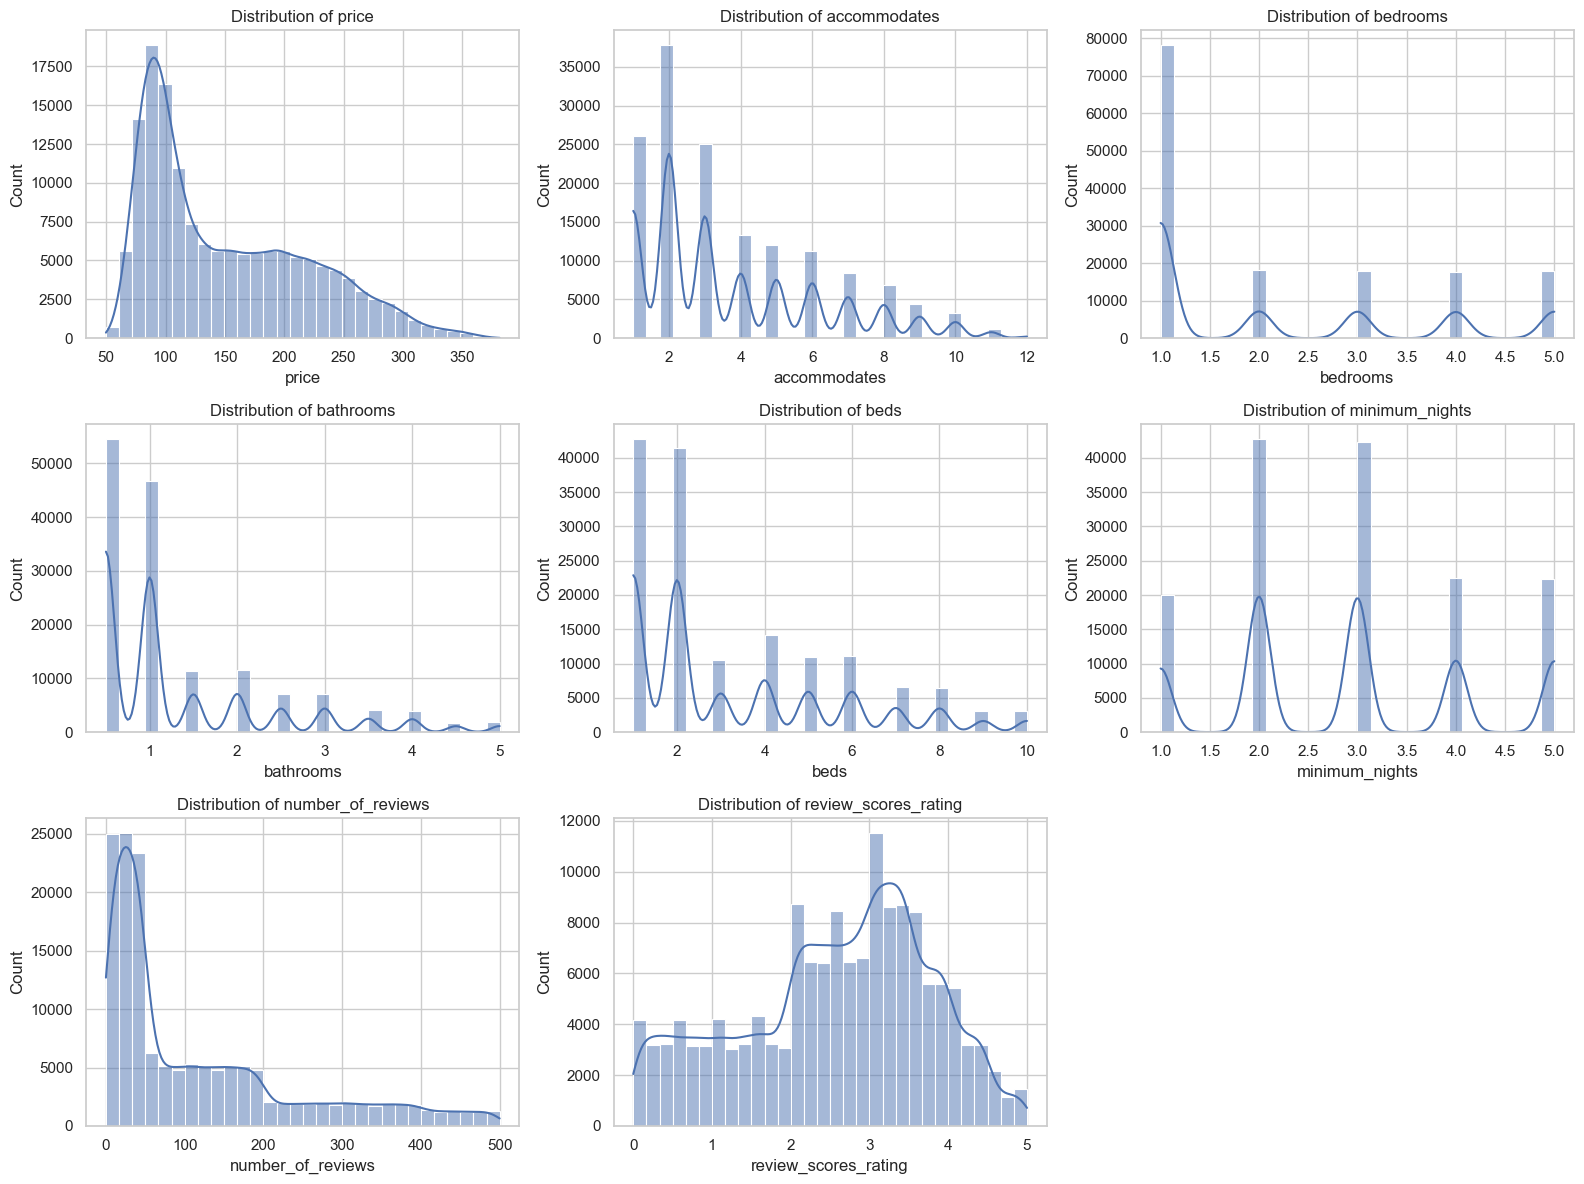

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

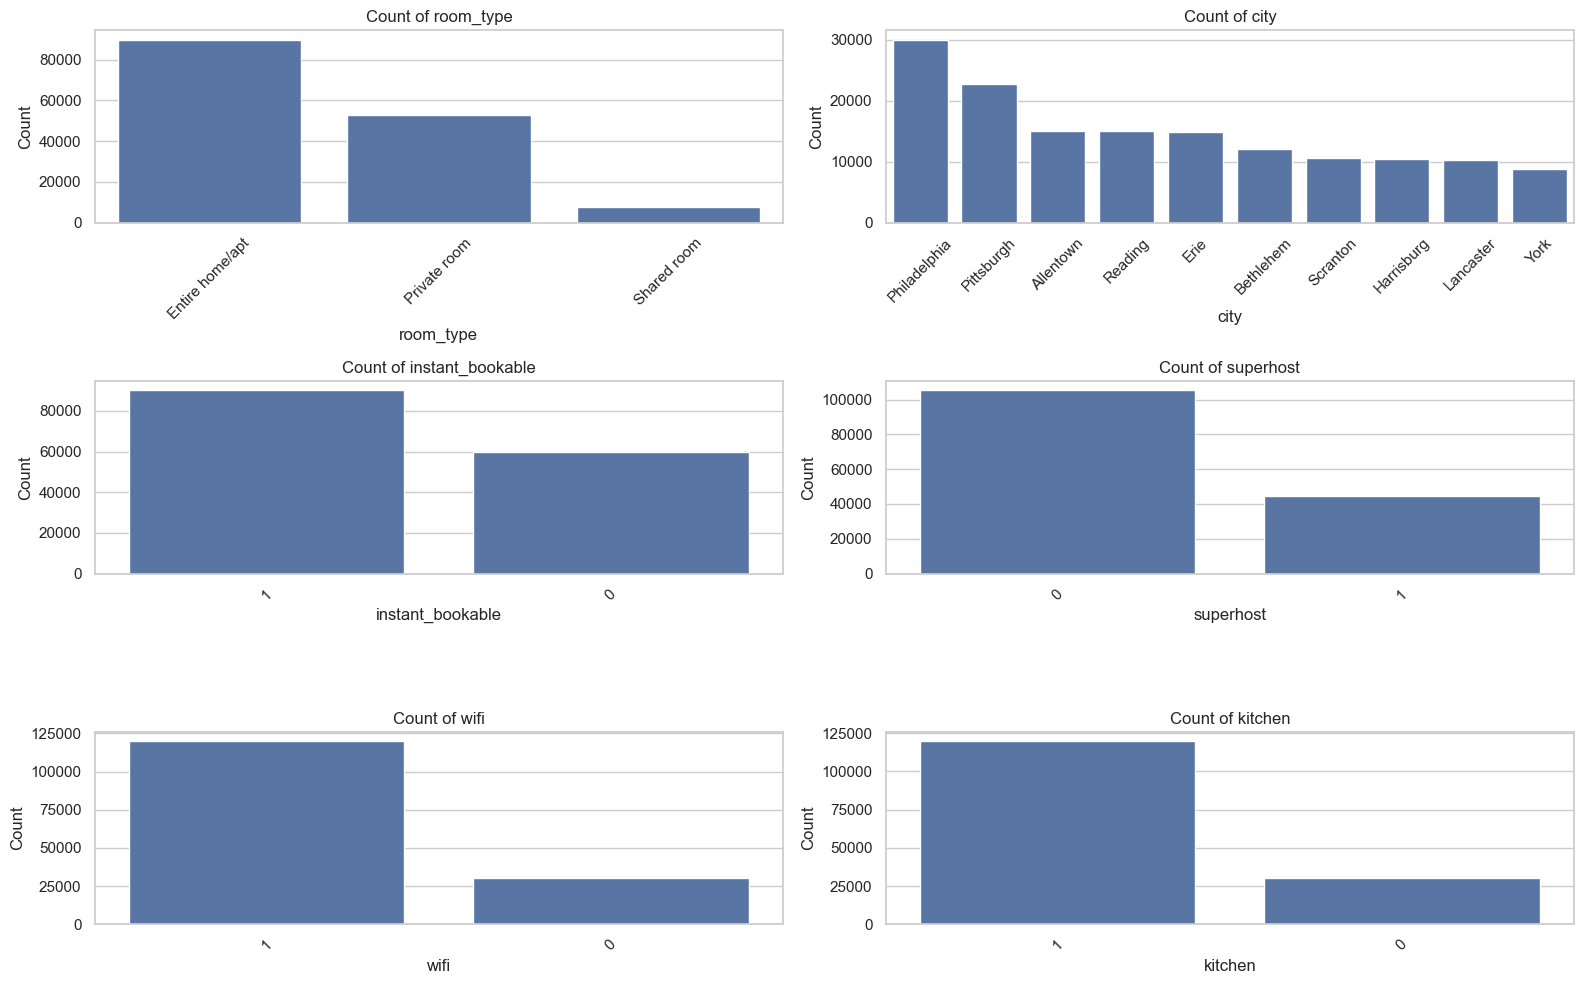

In [20]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

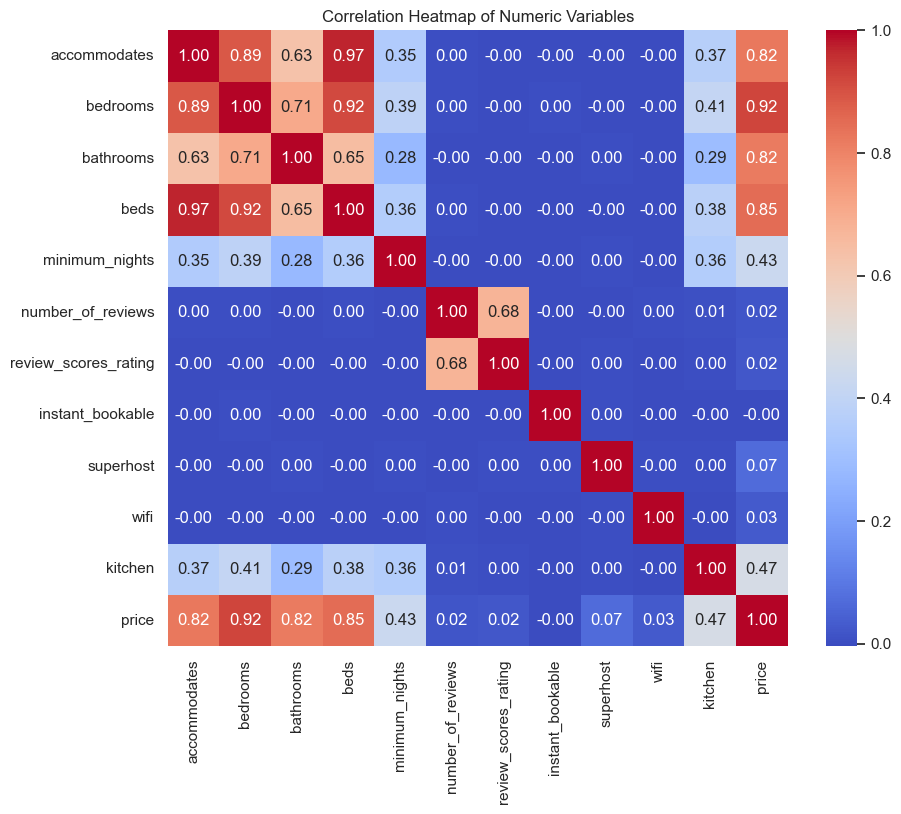

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

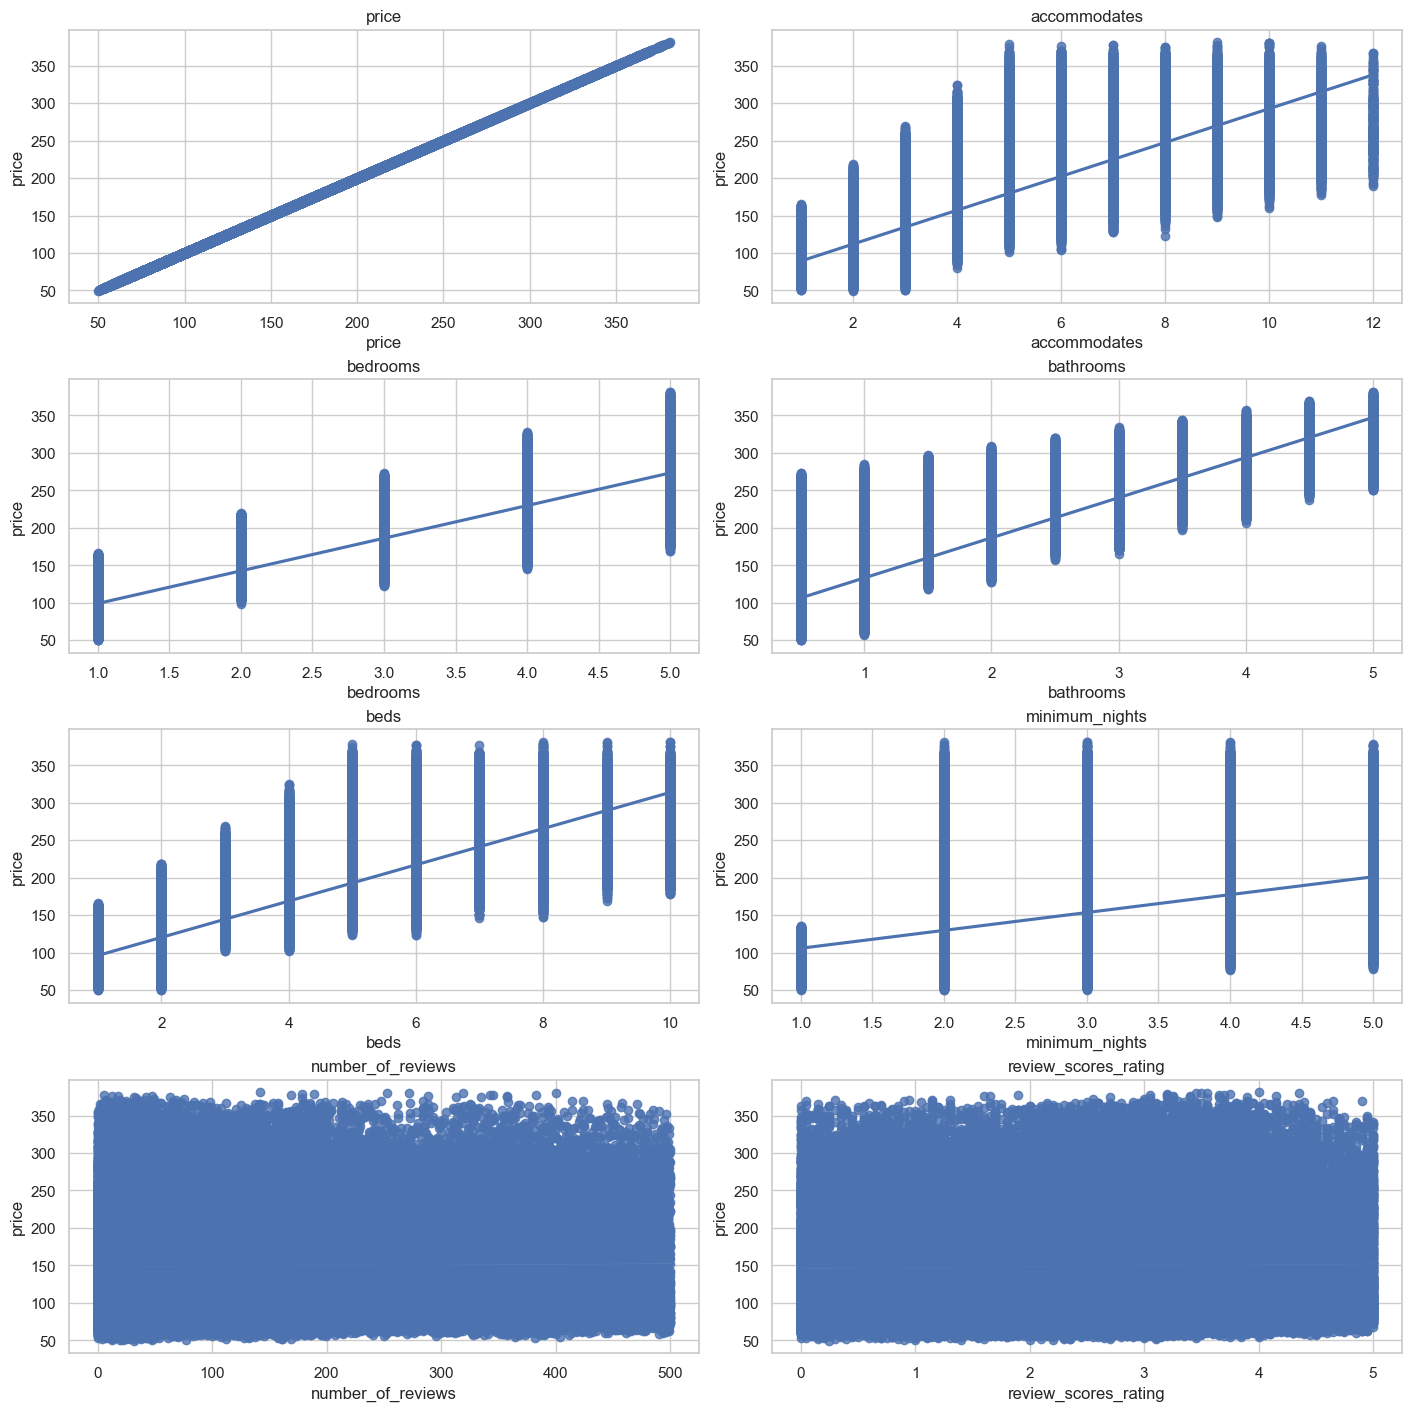

In [22]:
fig, axes=plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14,14), constrained_layout=True)

for col, ax in zip(num_cols, axes.flat):
    sns.regplot(x=df[col], y=df['price'], ax=ax)
    ax.set_title(col)

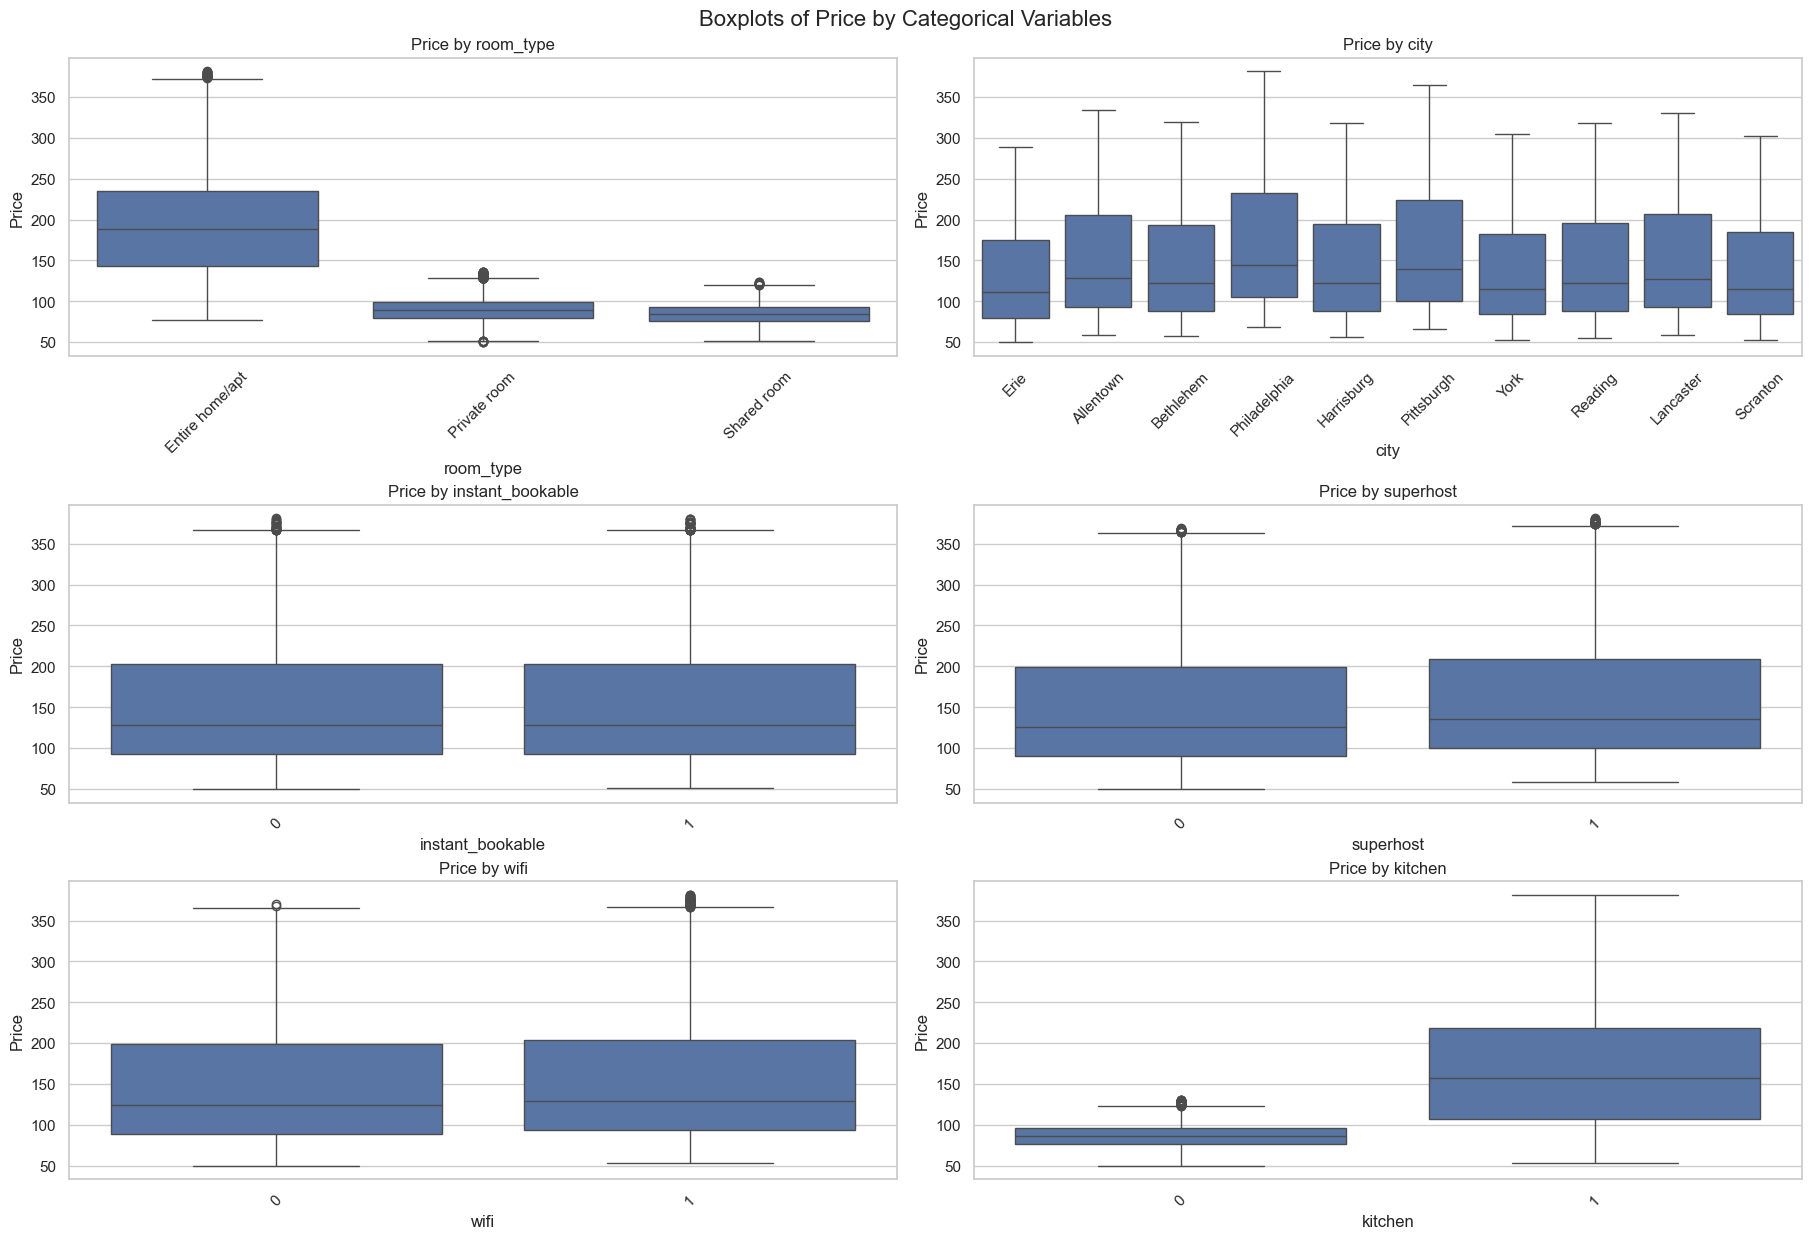

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12), constrained_layout=True)

for col, ax in zip(cat_cols, axes.flat):
    sns.boxplot(data=df, x=col, y='price', ax=ax)
    ax.set_title(f'Price by {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Boxplots of Price by Categorical Variables', fontsize=16, y=1.02)
plt.show()

In [24]:
df_encoded = pd.get_dummies(df, columns=['room_type', 'city'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149997 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   accommodates            149997 non-null  int64  
 1   bedrooms                149997 non-null  int64  
 2   bathrooms               149997 non-null  float64
 3   beds                    149997 non-null  int64  
 4   minimum_nights          149997 non-null  int64  
 5   number_of_reviews       149997 non-null  int64  
 6   review_scores_rating    149997 non-null  float64
 7   instant_bookable        149997 non-null  int64  
 8   superhost               149997 non-null  int64  
 9   wifi                    149997 non-null  int64  
 10  kitchen                 149997 non-null  int64  
 11  price                   149997 non-null  float64
 12  room_type_Private room  149997 non-null  bool   
 13  room_type_Shared room   149997 non-null  bool   
 14  city_Bethlehem          1

In [25]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(float)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149997 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   accommodates            149997 non-null  int64  
 1   bedrooms                149997 non-null  int64  
 2   bathrooms               149997 non-null  float64
 3   beds                    149997 non-null  int64  
 4   minimum_nights          149997 non-null  int64  
 5   number_of_reviews       149997 non-null  int64  
 6   review_scores_rating    149997 non-null  float64
 7   instant_bookable        149997 non-null  int64  
 8   superhost               149997 non-null  int64  
 9   wifi                    149997 non-null  int64  
 10  kitchen                 149997 non-null  int64  
 11  price                   149997 non-null  float64
 12  room_type_Private room  149997 non-null  float64
 13  room_type_Shared room   149997 non-null  float64
 14  city_Bethlehem          1

In [26]:
df_encoded = df_encoded.rename(columns={
    'room_type_Private room':'private_room',
    'room_type_Shared room':'shared_room',
    'city_Bethlehem':'beth',
    'city_Erie':'erie',
    'city_Harrisburg':'harr',
    'city_Lancaster':'lanc',
    'city_Philadelphia':'phil',
    'city_Pittsburgh':'pitt',
    'city_Reading':'read',
    'city_Scranton':'scra',
    'city_York':'york'
})
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149997 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   accommodates          149997 non-null  int64  
 1   bedrooms              149997 non-null  int64  
 2   bathrooms             149997 non-null  float64
 3   beds                  149997 non-null  int64  
 4   minimum_nights        149997 non-null  int64  
 5   number_of_reviews     149997 non-null  int64  
 6   review_scores_rating  149997 non-null  float64
 7   instant_bookable      149997 non-null  int64  
 8   superhost             149997 non-null  int64  
 9   wifi                  149997 non-null  int64  
 10  kitchen               149997 non-null  int64  
 11  price                 149997 non-null  float64
 12  private_room          149997 non-null  float64
 13  shared_room           149997 non-null  float64
 14  beth                  149997 non-null  float64
 15  erie 

In [27]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [28]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.285e+05
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:01:10   Log-Likelihood:            -5.5605e+05
No. Observations:              149997   AIC:                         1.112e+06
Df Residuals:                  149974   BIC:                         1.112e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   60.2446 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy() 
X_vif = X_vif.astype(float)

vif_airbnb = pd.DataFrame()
vif_airbnb["Feature"] = X_vif.columns
vif_airbnb["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_airbnb.sort_values("VIF", ascending=False))

                 Feature        VIF
0                  const  51.833906
4                   beds  22.863647
1           accommodates  17.817349
2               bedrooms   7.937957
12          private_room   2.866336
18                  phil   2.391544
19                  pitt   2.124452
3              bathrooms   2.006289
6      number_of_reviews   1.846453
7   review_scores_rating   1.846452
20                  read   1.793603
15                  erie   1.788199
14                  beth   1.654565
11               kitchen   1.606169
21                  scra   1.579792
16                  harr   1.572691
17                  lanc   1.567510
5         minimum_nights   1.530398
22                  york   1.494416
13           shared_room   1.466476
9              superhost   1.000179
8       instant_bookable   1.000171
10                  wifi   1.000153


In [30]:
X_refined = X.drop(columns=['beds'])
vif_df = pd.DataFrame()
vif_df["Feature"] = X_refined.columns
vif_df["VIF"] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]
print(vif_df.sort_values("VIF", ascending=False))

                 Feature        VIF
0                  const  51.311658
2               bedrooms   6.494869
1           accommodates   4.889642
11          private_room   2.866336
17                  phil   2.391534
18                  pitt   2.124449
3              bathrooms   2.006258
6   review_scores_rating   1.846452
5      number_of_reviews   1.846439
19                  read   1.793601
14                  erie   1.788198
13                  beth   1.654564
10               kitchen   1.606169
20                  scra   1.579789
15                  harr   1.572682
16                  lanc   1.567503
4         minimum_nights   1.530397
21                  york   1.494403
12           shared_room   1.457090
8              superhost   1.000175
7       instant_bookable   1.000152
9                   wifi   1.000150


In [31]:
X_refined = X.drop(columns=['beds', 'bedrooms'])
vif_df = pd.DataFrame()
vif_df["Feature"] = X_refined.columns
vif_df["VIF"] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]
print(vif_df.sort_values("VIF", ascending=False))

                 Feature        VIF
0                  const  50.401238
10          private_room   2.659301
16                  phil   2.391529
17                  pitt   2.124443
1           accommodates   2.089341
5   review_scores_rating   1.846446
4      number_of_reviews   1.846439
18                  read   1.793600
13                  erie   1.788191
2              bathrooms   1.702332
12                  beth   1.654534
9                kitchen   1.606164
19                  scra   1.579775
14                  harr   1.572678
15                  lanc   1.567495
3         minimum_nights   1.530327
20                  york   1.494375
11           shared_room   1.455931
7              superhost   1.000160
8                   wifi   1.000150
6       instant_bookable   1.000127


In [32]:
X_refined = X.drop(columns=['beds', 'bedrooms'])
model_refined = sm.OLS(y, X_refined).fit()
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.015e+05
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:01:16   Log-Likelihood:            -6.4746e+05
No. Observations:              149997   AIC:                         1.295e+06
Df Residuals:                  149976   BIC:                         1.295e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   74.7955 

In [33]:
X_refined = X.drop(columns=['number_of_reviews', 'lanc', 'instant_bookable', 'minimum_nights', 'beds', 'bedrooms'])
model_refined = sm.OLS(y, X_refined).fit()
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.269e+05
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:01:16   Log-Likelihood:            -6.4747e+05
No. Observations:              149997   AIC:                         1.295e+06
Df Residuals:                  149980   BIC:                         1.295e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   75.1165 

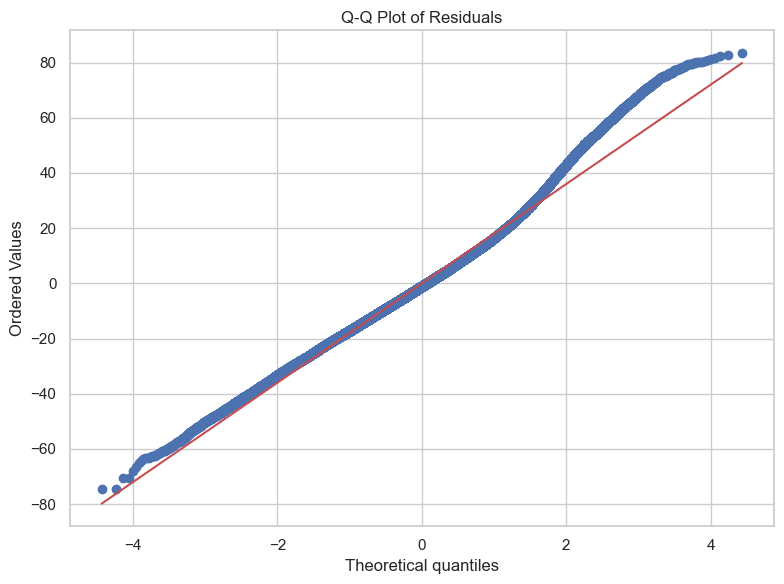

In [34]:
import scipy.stats as stats

residuals = model_refined.resid

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

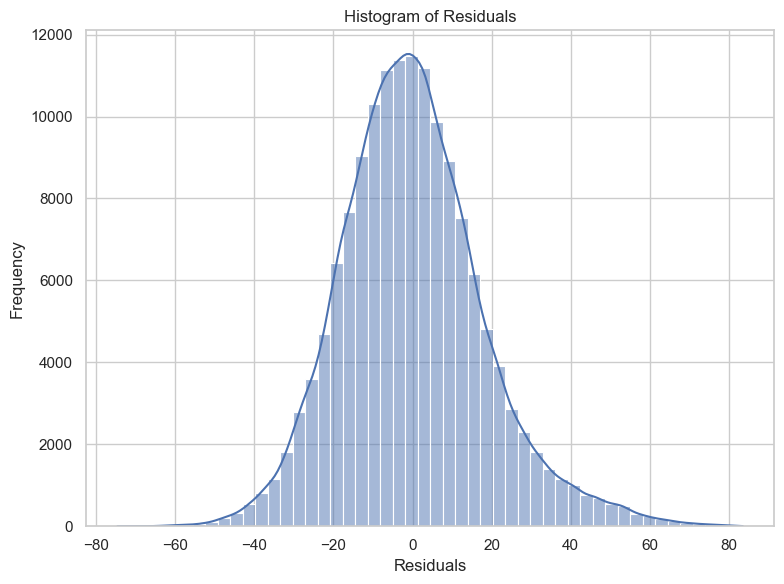

In [35]:
residuals = model_refined.resid
fitted = model_refined.fittedvalues

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

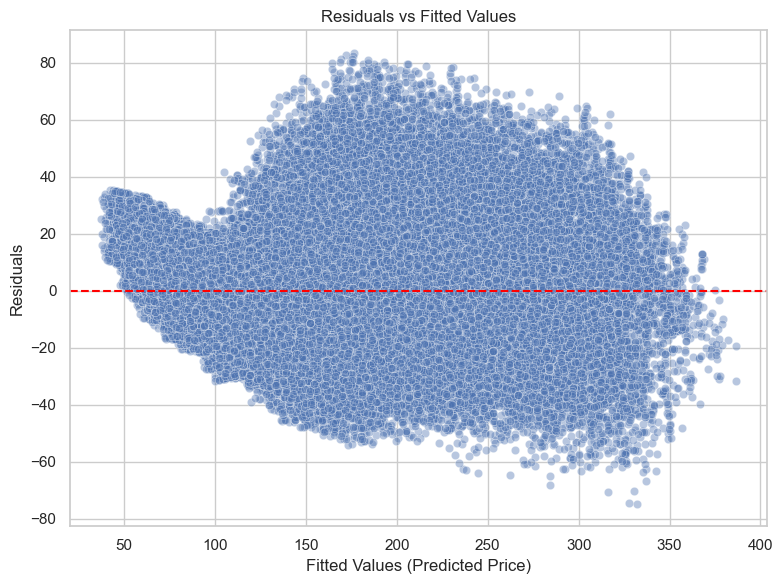

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted Price)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

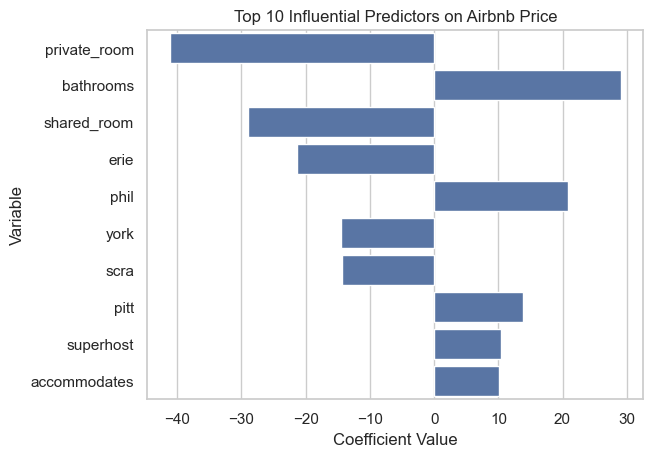

In [37]:
import numpy as np

coef_series = pd.Series(model_refined.params).drop("const")
top_coef = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)[:10]

sns.barplot(x=top_coef.values, y=top_coef.index)
plt.title("Top 10 Influential Predictors on Airbnb Price")
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_refined, y, test_size=0.2, random_state=42)

In [39]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")

R² Score: 0.931
MAE: $13.95
RMSE: $18.12
